<a href="https://colab.research.google.com/github/chalarm1405/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [20]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [21]:
from matplotlib import pyplot as plt

In [22]:
from sklearn.decomposition import PCA

In [23]:
Name = 'ชณะชัย อิสระกูล'
ID = '6230210459'

In [24]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [25]:
Data = DataGenerator(Name,ID)

021:22:12


In [26]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-8.590591,-3.384560,6.182718,-10.013727,-3.798767,-10.386514,-4.951959,4.412683,-4.209981,2.053323,-9.436627,7.189614,-7.128790,-6.411139,-1.171090,8.044543,4.895843,9.009631,5.613588,-2.318265,-2.903407,3.881669,-6.769120,21.408343
1,-1.780529,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802,-8.043338,-8.101059,-38.216691
2,-1.317042,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844,-9.399084,-10.469844,-44.995422
3,-2.890972,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597,0.524378,15.670803,4.621891
4,0.696475,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888,-9.344624,-10.069272,-44.723122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.578964,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820,3.362835,-7.191008,18.814176
9996,-6.233917,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513,3.070636,13.324941,17.353181
9997,9.641212,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021,-0.374443,-10.547509,0.127783
9998,-1.583269,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214,-0.209460,6.782490,0.952698


#######หลังจากการ RUN เพื่อทำการดูการกระจายของ DATA เสร็จแล้ว จะนำข้อมูลเหล่านี้ไปใช้ได้ ต้องทำการตัด data ที่มี Coorrelation ออกไปก่อน เพื่อเป็นการลด DATA ที่มีค่าเหมือนกันออกจาก DATA

In [27]:
Data.shape #เป็นการ RUN ผลออกมาเพื่อดูขนาดของข้อมูล

(10000, 24)

In [28]:
corr = np.corrcoef(Data.to_numpy().T)

In [29]:
corr.shape #ดูขนาด corrcoef ของ DATA

(24, 24)

#หลังจากดูขนาดของ corrcoef ของ DATA แล้วจึงทำการวนลูปเพื่อดูค่าข้อมูลที่ซ้ำกันหรือเหมือนกันของ correlation

In [30]:
for a in range(corr.shape[0]):
  for b in range(corr.shape[1]):
    if (a !=b) and (corr[a,b] == 1.):
      print(f'row = {a} colum = {b} corrcorf = {corr[a,b]}')

row = 1 colum = 22 corrcorf = 1.0
row = 22 colum = 1 corrcorf = 1.0


#######จะเห็นได้ว่าจากการ RUN เพื่อดู ค่าข้อมูลที่ซ้ำกันหรือเหมือนกันของ correlation พบว่า ไม่มีข้อมูลที่เหมือนหรือซ้ำกันแม้แต่ตัวเดียว เลยไม่ต้องตัด DATA ก็ได้

#การทำ 2 มิติ


In [31]:
from sklearn.cluster import KMeans #เป็นการนำเข้า function ที่เราจำเป็นต้องใช้ในการทำ K-mean

In [32]:
Kmeans = KMeans(n_clusters=3,random_state=2021) #เป็นการกำหนดค่าของ K ที่ต้องการ โดยการกำหนดนั้นเราอาจกำหนดขึ้นมาเท่าไหร่ก็ได้หรือเราไม่จำเป็นต้องกำหนดก็ได้

In [33]:
Kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [34]:
Kmeans.cluster_centers_ #แสดงจุดหรือข้อมูลที่สามารถคำนวณได้

array([[-1.07370880e+00, -4.17122542e+00, -1.29456817e+00,
         2.33845402e+00,  1.03771458e+00,  2.92734649e+00,
         5.97368967e+00, -6.82727664e+00,  1.39820561e+00,
        -7.61664508e-01,  5.17929330e+00,  4.99640557e+00,
         7.96223772e+00,  2.68293701e-01,  4.40056930e+00,
        -1.28688203e+00,  8.65574251e+00, -1.61502042e+00,
         3.29850792e+00,  4.71895898e-01,  8.61046089e+00,
        -9.23731429e+00, -8.34245084e+00, -4.41865714e+01],
       [ 3.28768086e+00,  2.84015862e+00,  2.04135591e+00,
         4.19100816e+00,  1.74455564e+00,  2.18588024e-03,
         1.23038709e+00, -9.33778073e-01, -1.80804036e+00,
        -1.89629324e+00, -1.87088045e+00, -6.28577680e-01,
         2.44786719e+00, -9.33835460e-01,  1.49349092e+00,
        -6.23945267e+00,  2.80955374e+00,  2.98459966e+00,
        -5.43717788e-02,  3.70459526e-01,  9.39920175e-01,
        -2.16222157e-01,  5.68031724e+00,  9.18889214e-01],
       [-7.63787102e-02,  1.03906067e-01,  1.39699712e

In [35]:
x = Kmeans.predict(Data) #แสดงการทดสอบการจับกลุ่ม
x

array([2, 0, 0, ..., 1, 1, 1], dtype=int32)

#ทำการลด PCA 

In [36]:
pca = PCA(n_components=2)

In [37]:
new_pca = pca.fit_transform(Data)

In [38]:
import matplotlib

In [39]:
matplotlib.rcParams['figure.figsize']=[13,23]

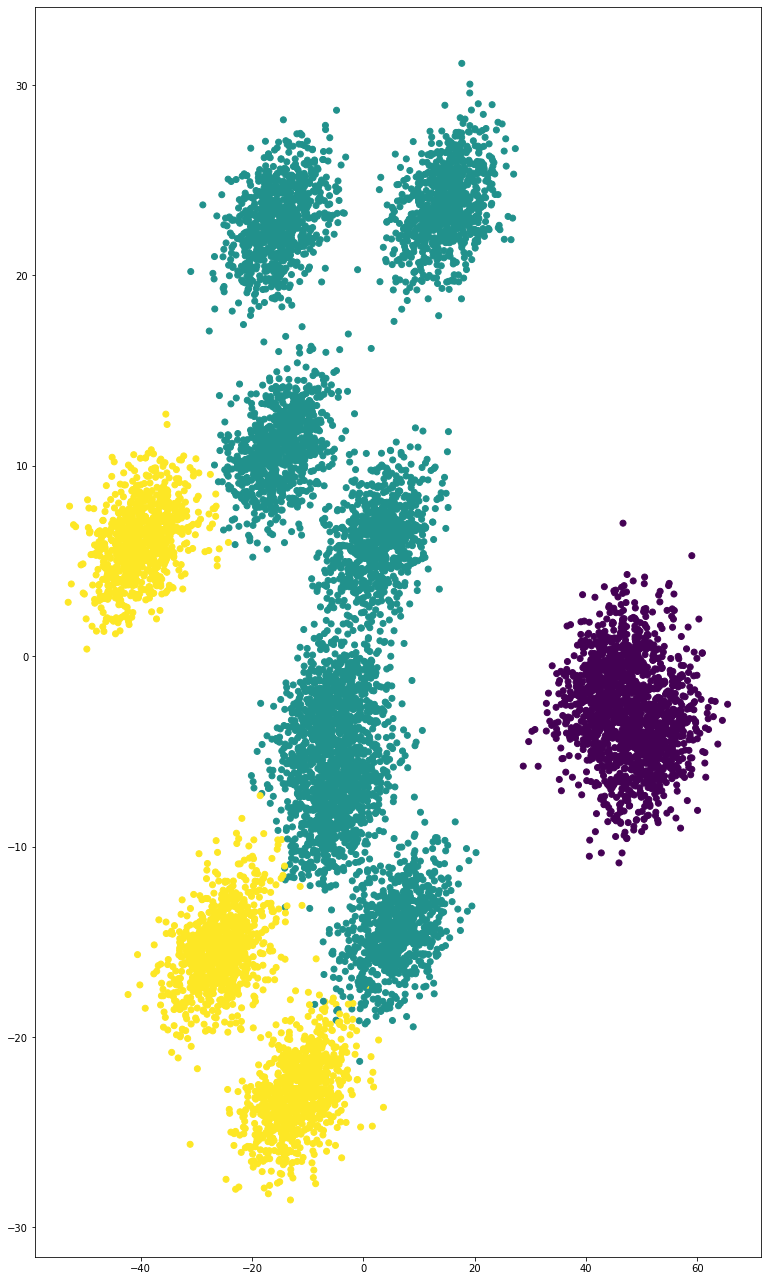

In [40]:
kmeans = KMeans(random_state=2021)
Kmeans.fit(Data)
x = Kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=x)

#เริ่มการคำนวณ SSE 

In [41]:
Kmeans.inertia_

7422139.144649109

#####จะเห็นได้ว่ามีค่า sse sum of squared error = 7422139.144649109


In [42]:
SSE = list()
for A in [1,2,3,4,5,6,7,8]:
  Kmeans = KMeans(n_clusters = A , random_state = 2021)
  YY = Kmeans.fit(Data)
  SSE.append(Kmeans.inertia_)

In [43]:
SSE

[13879602.78433308,
 9122631.046205603,
 7422139.144649109,
 6063062.142322729,
 4836369.819693639,
 3974830.28557136,
 3151727.1785474457,
 2500806.4740088503]

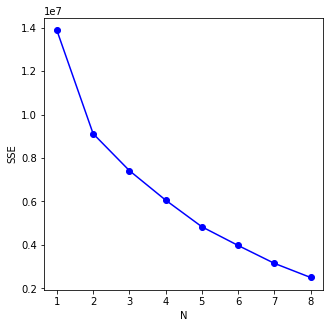

In [44]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('N')
plt.ylabel('SSE');

######จากกราฟจะเห็นว่า เมื่อเราทำการพิจารณาระยะห่าง จาก 1-3 พบว่ามีระยะห่างที่ค่อนข้างห่างกัน เพราะงั้นตัวแปรที่เหมาะสม คือ ตัวแปร K = 3 กลุ่ม

In [45]:
from sklearn import metrics

In [46]:
SilH = list()
for N in [2,3,4,5,6,7,8]:
  Kmeans = KMeans(n_clusters = N , random_state = 2021)
  Kmeans.fit(Data)
  score = metrics.silhouette_score(Data,Kmeans.labels_)
  SilH.append(score)

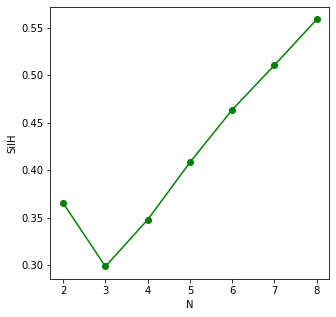

In [47]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('N')
plt.ylabel('SilH');

#####จากการพิจารณาพบว่า K = 2 เนื่องจากค่าความต่างของระยะห่างช่วง K = 2,3 และ 4

In [48]:
matplotlib.rcParams['figure.figsize']=[9,19] #การกำหนดขนาดกราฟ โดยเป็นการน้ค่า k ที่ได้มาแบ่งกลุ่ม

Text(0, 0.5, 'Y')

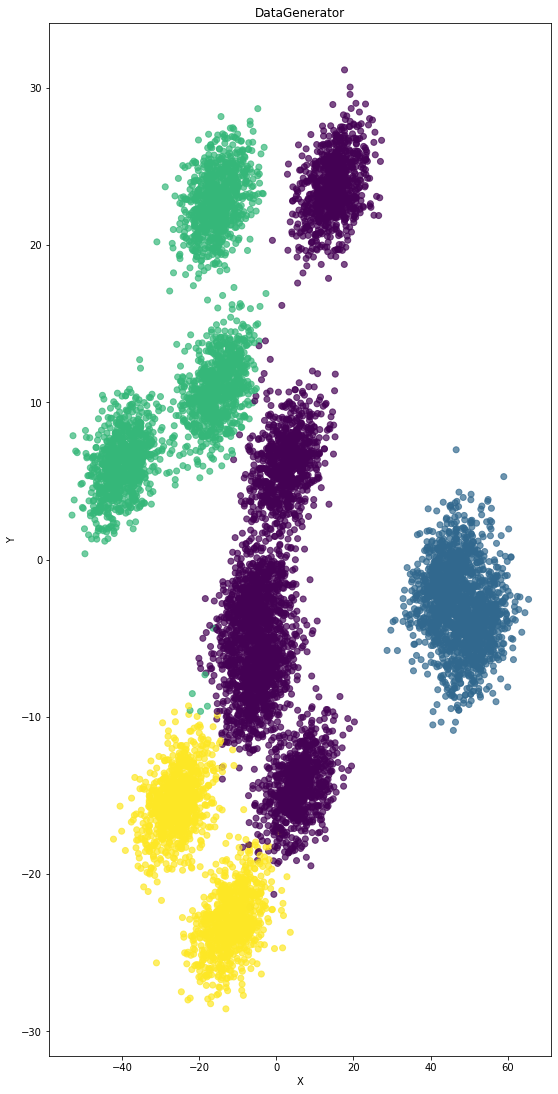

In [49]:
Kmeans = KMeans(n_clusters = 4,random_state = 2021)
Kmeans.fit(Data)
B = Kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=B,alpha=0.7)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

#####จากกราฟจะเห็นได้ว่า ในบางช่วงมีข้อมูลบางข้อมูลนั้นเกิดการทับซ้อนกัน เพราะ ข้อมูลมีจำนวนมาก

#การลด Dimension

###MDS

In [50]:
from sklearn.manifold import MDS

In [51]:
mds = MDS(n_components=2)

In [53]:
new_mds = mds.fit_transform(Data)

In [56]:
Kmeans_1 = KMeans(n_clusters=4,random_state=2021)
Kmeans_1.fit(Data)
H = Kmeans_1.predict(Data)

AttributeError: ignored

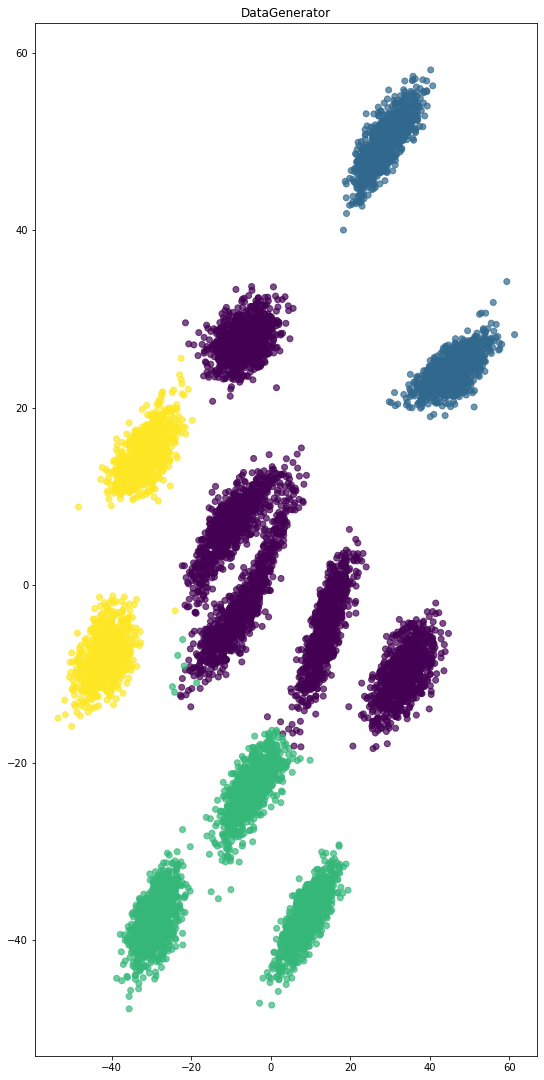

In [57]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=H,alpha=0.7)
plt.title('DataGenerator')
plt.xlable('X')
plt.xlable('Y')

######เทียบข้อ 2 กับ 3

AttributeError: ignored

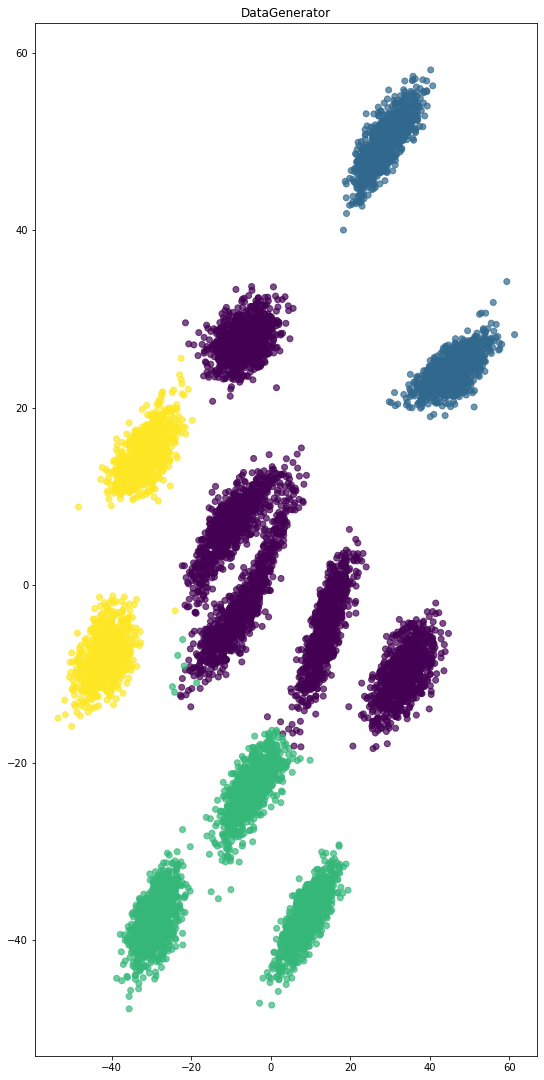

In [58]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=B,alpha=0.7)
plt.title('DataGenerator')
plt.xlable('X')
plt.xlable('Y')

AttributeError: ignored

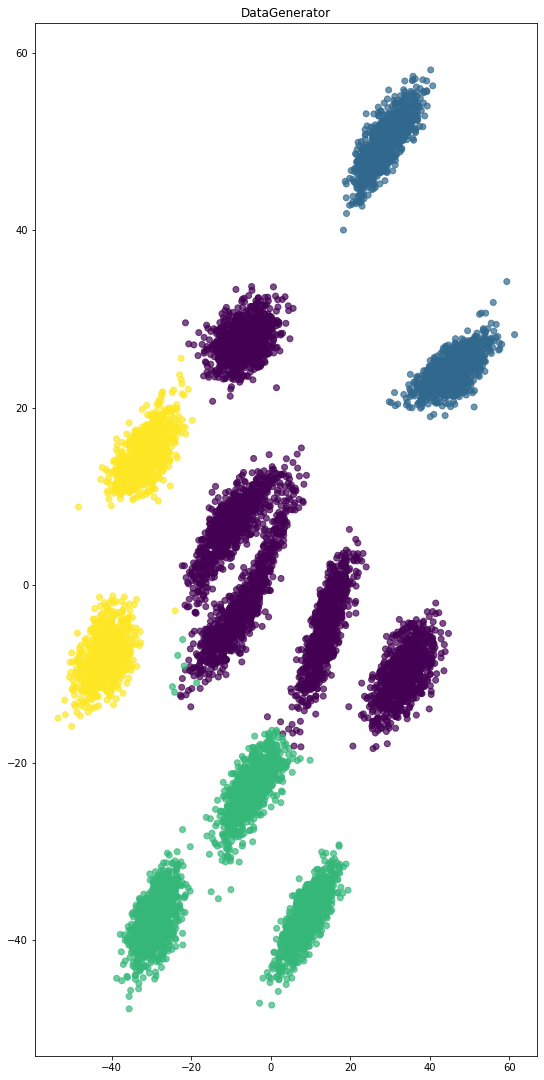

In [59]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=H,alpha=0.7)
plt.title('DataGenerator')
plt.xlable('X')
plt.xlable('Y')